In [1]:
import trimesh
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import seaborn as sns

In [3]:
data_dir = '/Users/madelineloui/Documents/MIT/Classes/EC.712/scanning/data'

### Baseline

In [5]:
scan_path = f'{data_dir}/scans/casa yas antes.glb'
scene = trimesh.load(scan_path)
total_vertices = sum(len(g.vertices) for g in scene.geometry.values())
total_triangles = sum(len(g.faces) for g in scene.geometry.values())
area = scene.area
vertex_density = total_vertices/area
triangle_density = total_triangles/area

print(vertex_density)
print(triangle_density)

407.5431227079934
592.7992791218575


### Quantitative Assessment
Note that area is in meters

In [33]:
# Load existing data
df = pd.read_csv(f'{data_dir}/scan_results.csv')
df.head()

,Room,Center/close to wall (within 5 ft),Technique,Filename,Sq Ft,Scanning Time (s),Rendering Time (s),Raw Data File Size (MB),File Size (MB) without raw data,Visual Quality (Score 1-5)
0,Closet,Center,Lidar (speed),closet_center_lidar_SPEED.glb,NaN,91,19,120.8,4.4,NaN
1,Closet,Center,Lidar (area),closet_center_lidar_AREA.glb,NaN,91,39,120.8,14.5,NaN
2,Closet,Close to wall,Lidar (speed),closet_close_to_wall_lidar_SPEED.glb,NaN,620,70,732.3,4.9,NaN
3,Closet,Close to wall,Lidar (area),closet_close_to_wall_lidar_AREA.glb,NaN,620,158,732.3,15.7,NaN
4,Conference,Center,Lidar (speed),conference_room_center_lidar_SPEED.glb,NaN,106,21,140.5,3.8,NaN


In [64]:
# Measure quality of each

# Initialize empty columns
df["Vertex count"] = None
df["Triangle count"] = None
df["Mesh area (m^2)"] = None

for file_name in df["Filename"]:  # or df["file_name"], adjust as needed
    path = f"{file_dir}/{file_name}"
    scene = trimesh.load(path)

    total_vertices = sum(len(g.vertices) for g in scene.geometry.values())
    total_triangles = sum(len(g.faces) for g in scene.geometry.values())
    area = scene.area

    # Update matching row
    df.loc[df["Filename"] == file_name, "Vertex count"] = total_vertices
    df.loc[df["Filename"] == file_name, "Triangle count"] = total_triangles
    df.loc[df["Filename"] == file_name, "Mesh area"] = area

# Done — df now includes new columns
df.head()

,Room,Center/close to wall (within 5 ft),Technique,Filename,Sq Ft,Scanning Time (s),Rendering Time (s),Raw Data File Size (MB),File Size (MB) without raw data,Visual Quality (Score 1-5),Vertex count,Triangle count,Mesh area (m^2),Mesh area
0,Closet,Center,Lidar (speed),closet_center_lidar_SPEED.glb,NaN,91,19,120.8,4.4,NaN,39993,52885,None,49.939354
1,Closet,Center,Lidar (area),closet_center_lidar_AREA.glb,NaN,91,39,120.8,14.5,NaN,132666,179096,None,50.677093
2,Closet,Close to wall,Lidar (speed),closet_close_to_wall_lidar_SPEED.glb,NaN,620,70,732.3,4.9,NaN,36817,42949,None,69.653172
3,Closet,Close to wall,Lidar (area),closet_close_to_wall_lidar_AREA.glb,NaN,620,158,732.3,15.7,NaN,169823,209804,None,73.251163
4,Conference,Center,Lidar (speed),conference_room_center_lidar_SPEED.glb,NaN,106,21,140.5,3.8,NaN,28748,41742,None,127.508934


In [65]:
df.to_csv(f'{data_dir}scan_results_trimesh.csv')

#### Visualizations

In [59]:
df = pd.read_csv(f'{data_dir}/scan_results_trimesh.csv')
df.head()

,Unnamed: 0,Room,Center/close to wall (within 5 ft),Technique,Filename,Sq Ft,Scanning Time (s),Rendering Time (s),Raw Data File Size (MB),File Size (MB) without raw data,Visual Quality (Score 1-5),Vertex count,Triangle count,Mesh area
0,0,Closet,Center,Lidar (speed),closet_center_lidar_SPEED.glb,NaN,91,19,120.8,4.4,NaN,39993,52885,49.939354
1,1,Closet,Center,Lidar (area),closet_center_lidar_AREA.glb,NaN,91,39,120.8,14.5,NaN,132666,179096,50.677093
2,2,Closet,Close to wall,Lidar (speed),closet_close_to_wall_lidar_SPEED.glb,NaN,620,70,732.3,4.9,NaN,36817,42949,69.653172
3,3,Closet,Close to wall,Lidar (area),closet_close_to_wall_lidar_AREA.glb,NaN,620,158,732.3,15.7,NaN,169823,209804,73.251163
4,4,Conference,Center,Lidar (speed),conference_room_center_lidar_SPEED.glb,NaN,106,21,140.5,3.8,NaN,28748,41742,127.508934


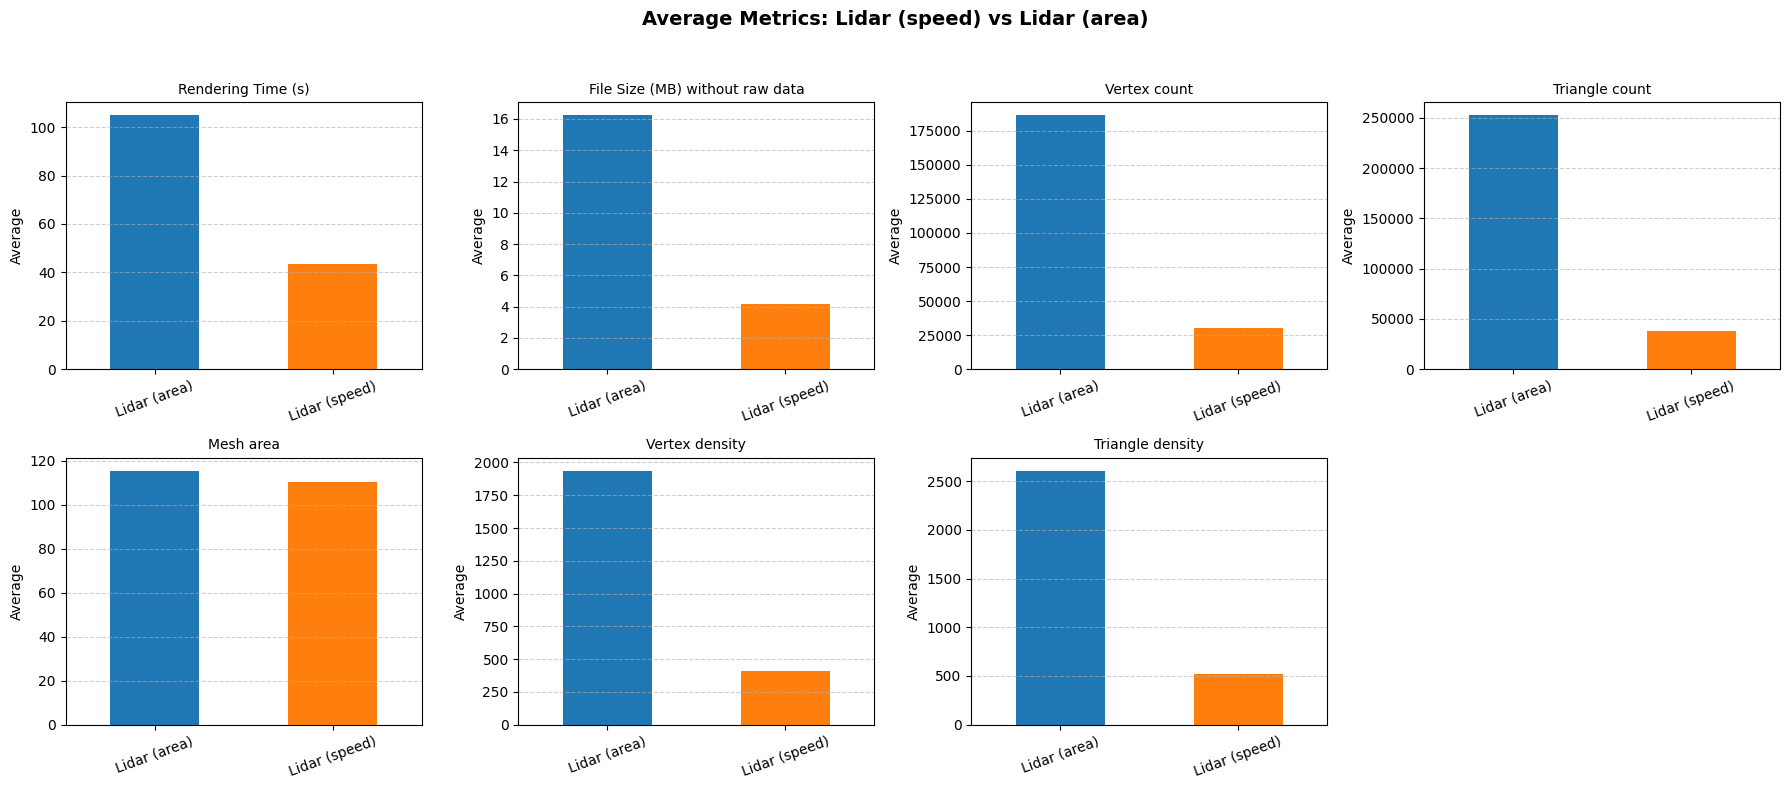

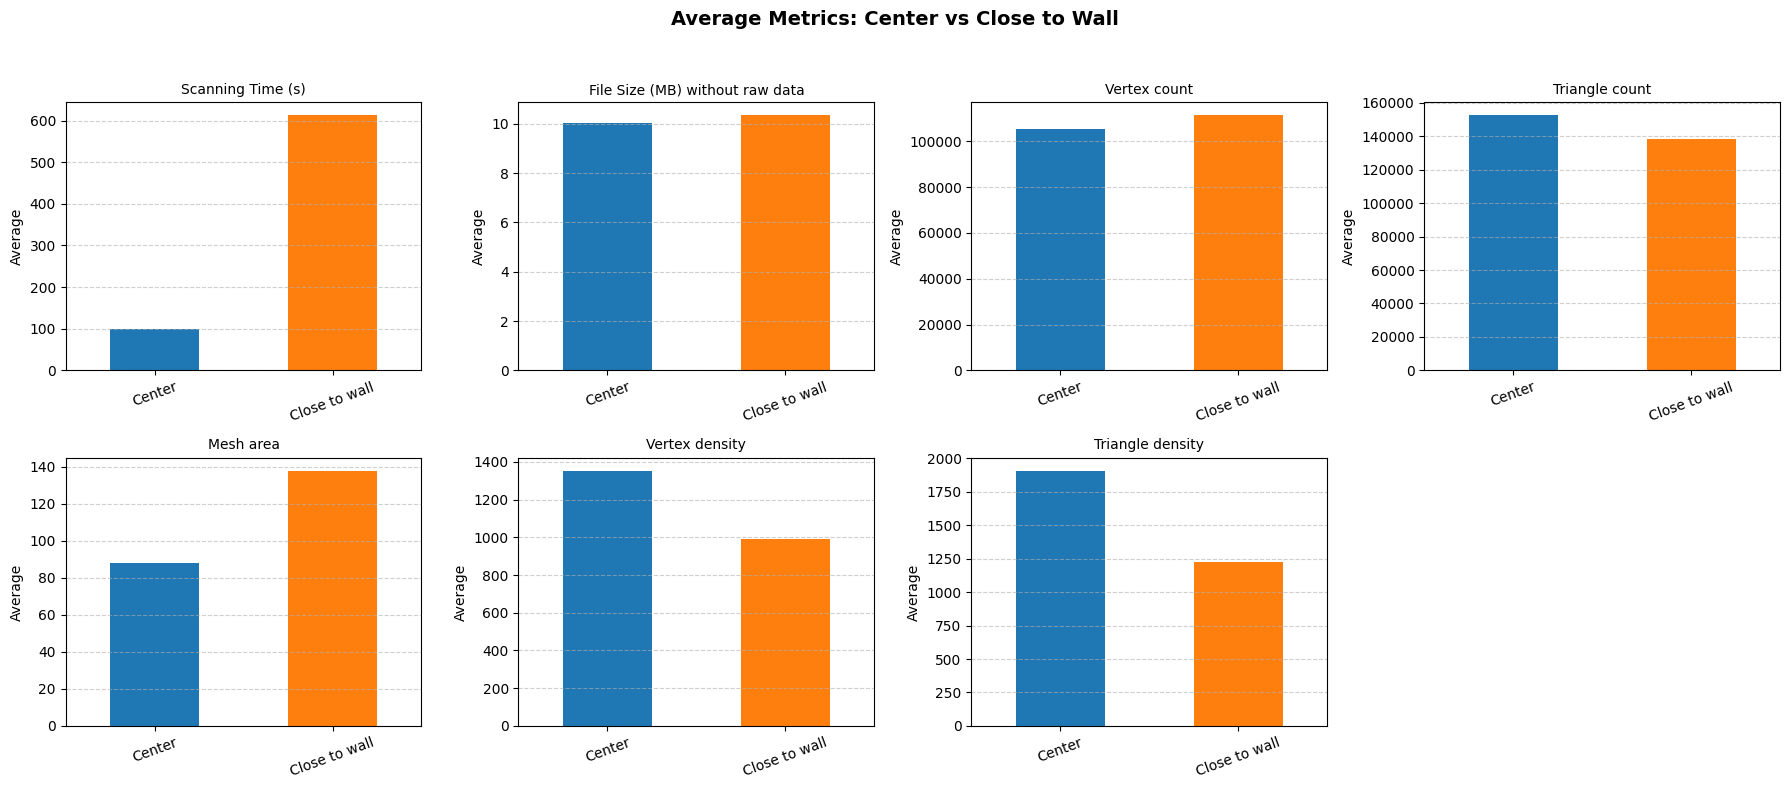

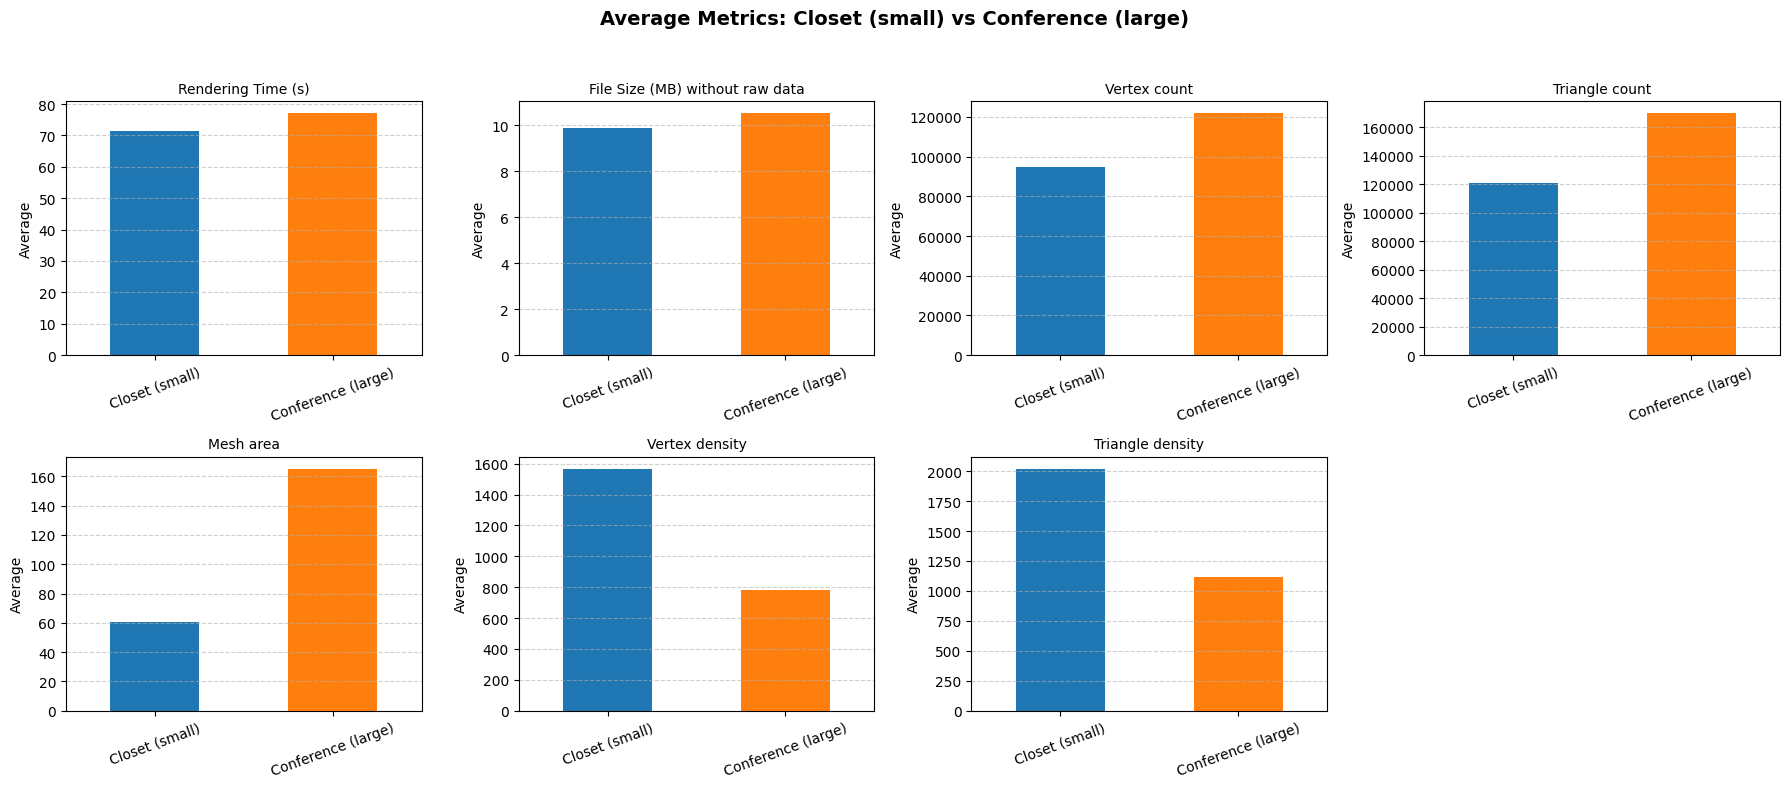

In [48]:
# --- Clean column names ---
df.columns = df.columns.str.strip()

# --- Compute derived metrics ---
df["Vertex density"] = df["Vertex count"] / df["Mesh area"]
df["Triangle density"] = df["Triangle count"] / df["Mesh area"]

# --- Define plotting function with optional renaming ---
def plot_grouped_averages_horizontal(group_col, metrics, title, rename_dict=None):
    # Make a copy and optionally rename group labels
    df_plot = df.copy()
    if rename_dict:
        df_plot[group_col] = df_plot[group_col].replace(rename_dict)

    # Compute average metrics per group
    avg = df_plot.groupby(group_col)[metrics].mean()

    # --- Plot layout ---
    n_metrics = len(metrics)
    ncols = int(np.ceil(n_metrics / 2))
    nrows = 2
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 8))
    fig.suptitle(title, fontsize=14, fontweight="bold")
    axes = axes.flatten()

    # Colors (consistent across all plots)
    base_colors = plt.cm.tab10.colors[:2]

    # --- Plot each metric ---
    for i, metric in enumerate(metrics):
        avg[metric].plot(
            kind="bar",
            ax=axes[i],
            color=base_colors,
        )
        axes[i].set_title(metric, fontsize=10)
        axes[i].set_ylabel("Average")
        axes[i].set_xlabel("")
        axes[i].grid(True, axis="y", linestyle="--", alpha=0.6)
        axes[i].tick_params(axis="x", rotation=20)
    
    # Hide unused subplots if metrics don't fill all slots
    for j in range(len(metrics), len(axes)):
        axes[j].axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# --- Lidar (speed) vs Lidar (area) ---
plot_grouped_averages_horizontal(
    group_col="Technique",
    metrics=[
        "Rendering Time (s)",
        "File Size (MB) without raw data",
        "Vertex count",
        "Triangle count",
        "Mesh area",
        "Vertex density",
        "Triangle density"
    ],
    title="Average Metrics: Lidar (speed) vs Lidar (area)"
)

# --- Center vs Close to wall ---
plot_grouped_averages_horizontal(
    group_col="Center/close to wall (within 5 ft)",
    metrics=[
        "Scanning Time (s)",
        "File Size (MB) without raw data",
        "Vertex count",
        "Triangle count",
        "Mesh area",
        "Vertex density",
        "Triangle density"
    ],
    title="Average Metrics: Center vs Close to Wall"
)

# --- Closet (small) vs Conference (large) ---
plot_grouped_averages_horizontal(
    group_col="Room",
    metrics=[
        "Rendering Time (s)",
        "File Size (MB) without raw data",
        "Vertex count",
        "Triangle count",
        "Mesh area",
        "Vertex density",
        "Triangle density"
    ],
    rename_dict={"Closet": "Closet (small)", "Conference": "Conference (large)"},
    title="Average Metrics: Closet (small) vs Conference (large)"
)

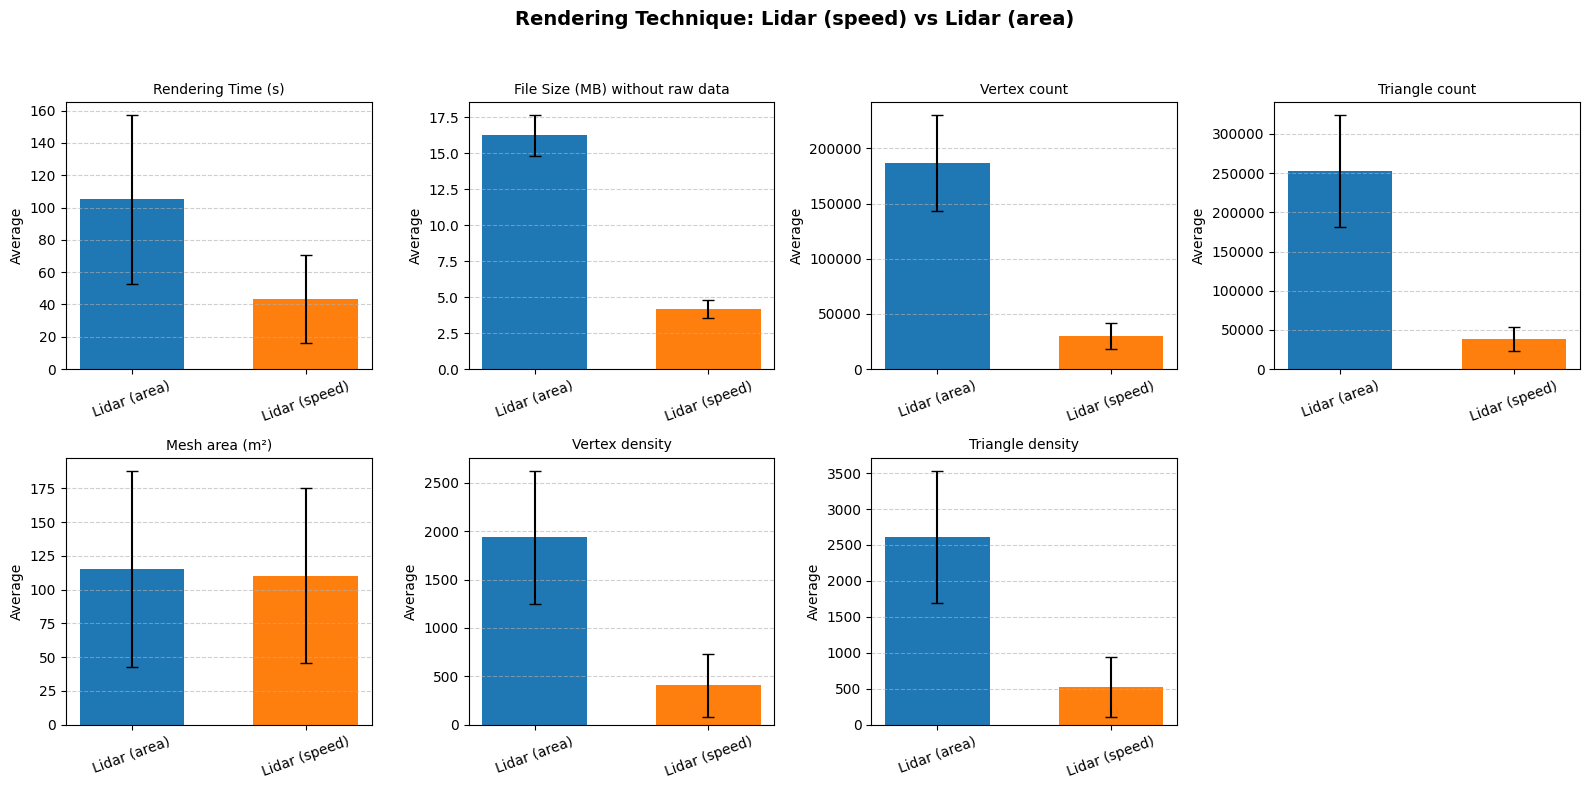

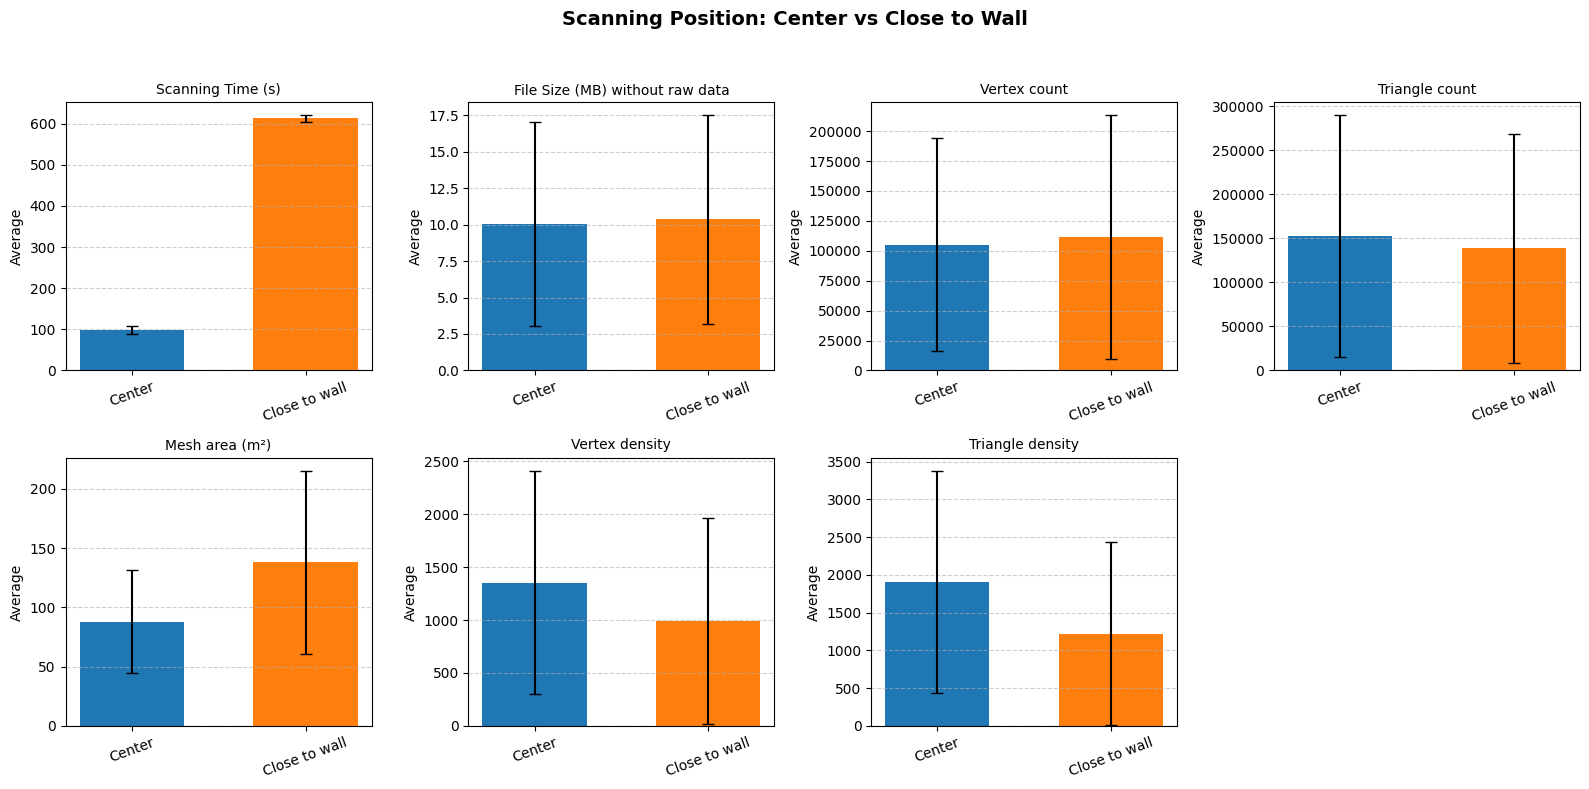

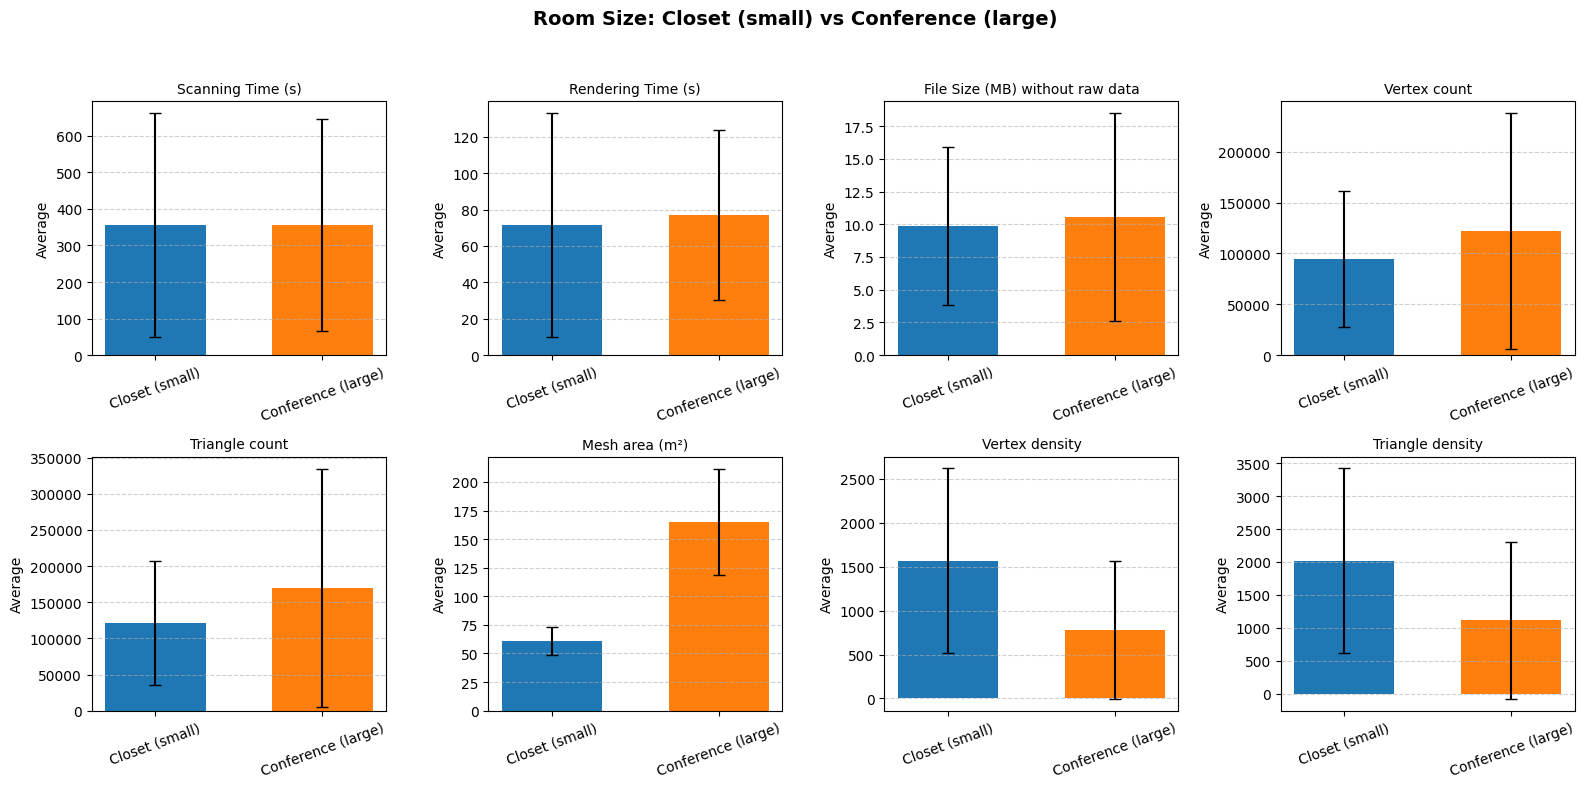

In [63]:
# --- Clean column names ---
df.columns = df.columns.str.strip()

# --- Compute derived metrics ---
df["Vertex density"] = df["Vertex count"] / df["Mesh area"]
df["Triangle density"] = df["Triangle count"] / df["Mesh area"]

# --- Define plotting function with standard deviations and label rename ---
def plot_grouped_averages_horizontal_std(group_col, metrics, title, rename_dict=None):
    # Copy df for safety
    df_plot = df.copy()

    # Optional renaming for readability (e.g., Closet → Closet (small))
    if rename_dict:
        df_plot[group_col] = df_plot[group_col].replace(rename_dict)

    # Create display-friendly metric names (for axis titles)
    display_names = {m: ("Mesh area (m²)" if m == "Mesh area" else m) for m in metrics}

    # Compute means and standard deviations
    avg = df_plot.groupby(group_col)[metrics].mean()
    std = df_plot.groupby(group_col)[metrics].std()

    # Compute subplot grid shape (2 rows)
    n_metrics = len(metrics)
    ncols = int(np.ceil(n_metrics / 2))
    nrows = 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 8))
    fig.suptitle(title, fontsize=14, fontweight="bold")
    axes = axes.flatten()

    # Fixed colors: blue and orange
    base_colors = plt.cm.tab10.colors[:2]

    for i, metric in enumerate(metrics):
        avg_vals = avg[metric]
        std_vals = std[metric]
        x = np.arange(len(avg_vals))

        axes[i].bar(
            x,
            avg_vals.values,
            yerr=std_vals.values,
            color=base_colors[:len(avg_vals)],
            capsize=4,
            width=0.6
        )
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(avg_vals.index, rotation=20)
        axes[i].set_title(display_names[metric], fontsize=10)  # renamed label here
        axes[i].set_ylabel("Average")
        axes[i].grid(True, axis="y", linestyle="--", alpha=0.6)

    # Hide unused subplots
    for j in range(len(metrics), len(axes)):
        axes[j].axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# --- Lidar (speed) vs Lidar (area) ---
plot_grouped_averages_horizontal_std(
    group_col="Technique",
    metrics=[
        "Rendering Time (s)",
        "File Size (MB) without raw data",
        "Vertex count",
        "Triangle count",
        "Mesh area",
        "Vertex density",
        "Triangle density"
    ],
    title="Rendering Technique: Lidar (speed) vs Lidar (area)"
)

# --- Center vs Close to wall ---
plot_grouped_averages_horizontal_std(
    group_col="Center/close to wall (within 5 ft)",
    metrics=[
        "Scanning Time (s)",
        "File Size (MB) without raw data",
        "Vertex count",
        "Triangle count",
        "Mesh area",
        "Vertex density",
        "Triangle density"
    ],
    title="Scanning Position: Center vs Close to Wall"
)

# --- Closet (small) vs Conference (large) ---
plot_grouped_averages_horizontal_std(
    group_col="Room",
    metrics=[
        "Scanning Time (s)",
        "Rendering Time (s)",
        "File Size (MB) without raw data",
        "Vertex count",
        "Triangle count",
        "Mesh area",
        "Vertex density",
        "Triangle density"
    ],
    rename_dict={"Closet": "Closet (small)", "Conference": "Conference (large)"},
    title="Room Size: Closet (small) vs Conference (large)"
)

### Qualitative Assessment

In [54]:
df = pd.read_csv(f'{data_dir}/qual_results.csv')
df.head()

,Person,Scan,Room,Position,Technique,Filename,Texture Clarity,Geometric Fidelity,Completeness,Artifact Level,Total Score
0,Amy,Closet Centre AREA,Closet,Center,Lidar (area),closet_center_lidar_AREA.glb,3,3,3,2,11
1,Amy,Closet Centre SPEED,Closet,Center,Lidar (speed),closet_center_lidar_SPEED.glb,2,2,3,2,9
2,Amy,Closed Close to Wall AREA,Closet,Close to wall,Lidar (area),closet_close_to_wall_lidar_AREA.glb,2,2,2,4,10
3,Amy,Closet Close to Wall SPEED,Closet,Close to wall,Lidar (speed),closet_close_to_wall_lidar_SPEED.glb,2,2,2,4,10
4,Amy,Conference Room Centre AREA,Conference,Center,Lidar (area),conference_room_center_lidar_AREA.glb,1,2,2,1,6


In [15]:
# List of variables to test
variables = ["Texture Clarity", "Geometric Fidelity", "Completeness", "Artifact Level", "Total Score"]

# Compute inter-rater correlations for each variable
for var in variables:
    # Pivot so each person’s scores are columns
    pivot = df.pivot(index="Scan", columns="Person", values=var)
    
    # Compute Spearman correlation between raters for this metric
    corr = pivot.corr(method="spearman")
    
    # Compute overall average correlation (excluding self-correlations)
    avg_corr = corr.where(~corr.eq(1)).mean().mean()
    
    print(f"{var}: average inter-rater correlation = {avg_corr:.3f}")

Texture Clarity: average inter-rater correlation = 0.299
Geometric Fidelity: average inter-rater correlation = 0.589
Completeness: average inter-rater correlation = 0.278
Artifact Level: average inter-rater correlation = 0.444
Total Score: average inter-rater correlation = 0.732


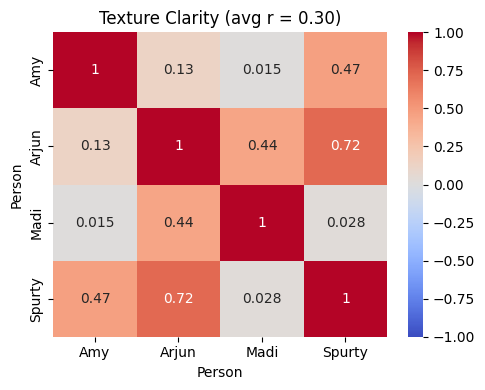

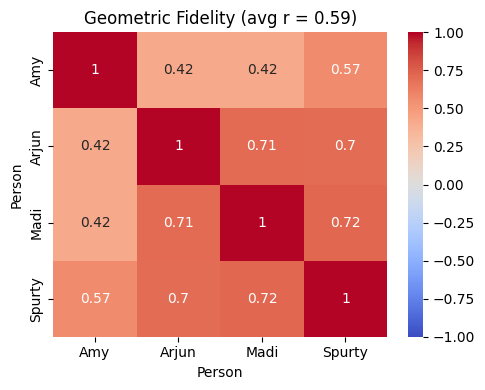

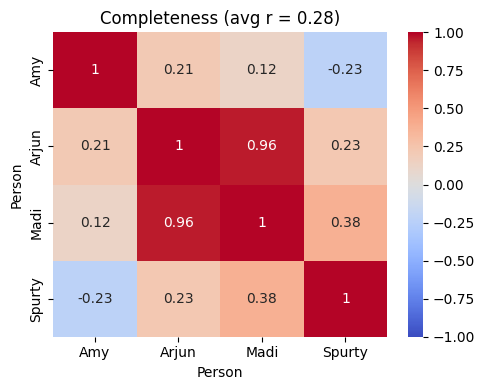

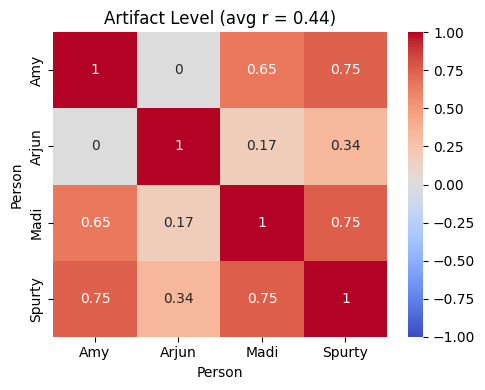

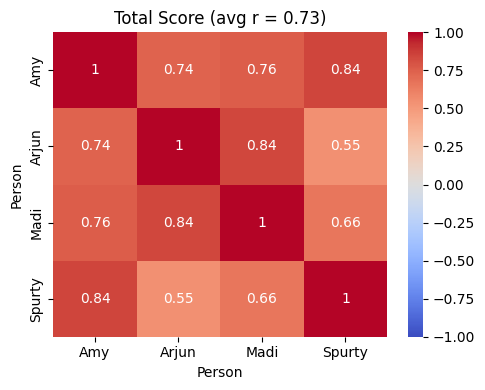

In [16]:
for var in variables:
    # Pivot: scans as rows, raters as columns
    pivot = df.pivot(index="Scan", columns="Person", values=var)
    
    # Compute Spearman correlation
    corr = pivot.corr(method="spearman")
    
    # Compute average inter-rater correlation (excluding self-correlations)
    avg_corr = corr.where(~np.eye(len(corr), dtype=bool)).mean().mean()
    
    # Print result
    #print(f"{var:20s} | Average inter-rater correlation: {avg_corr:.3f}")
    
    # Plot heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"{var} (avg r = {avg_corr:.2f})")
    plt.tight_layout()
    plt.show()

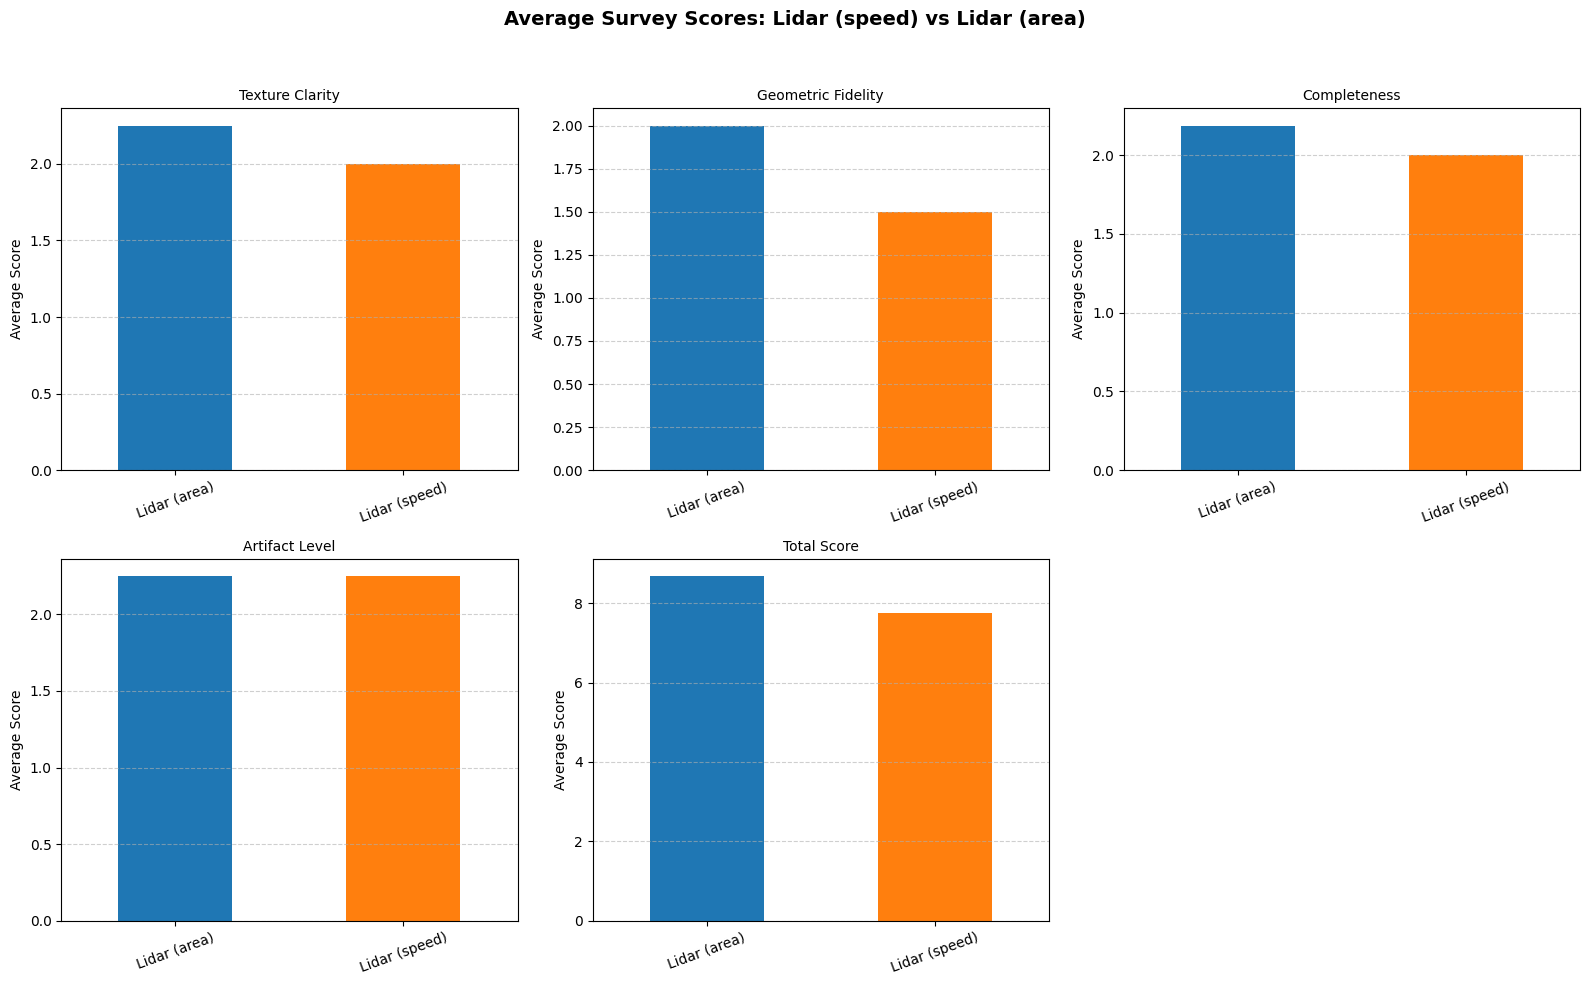

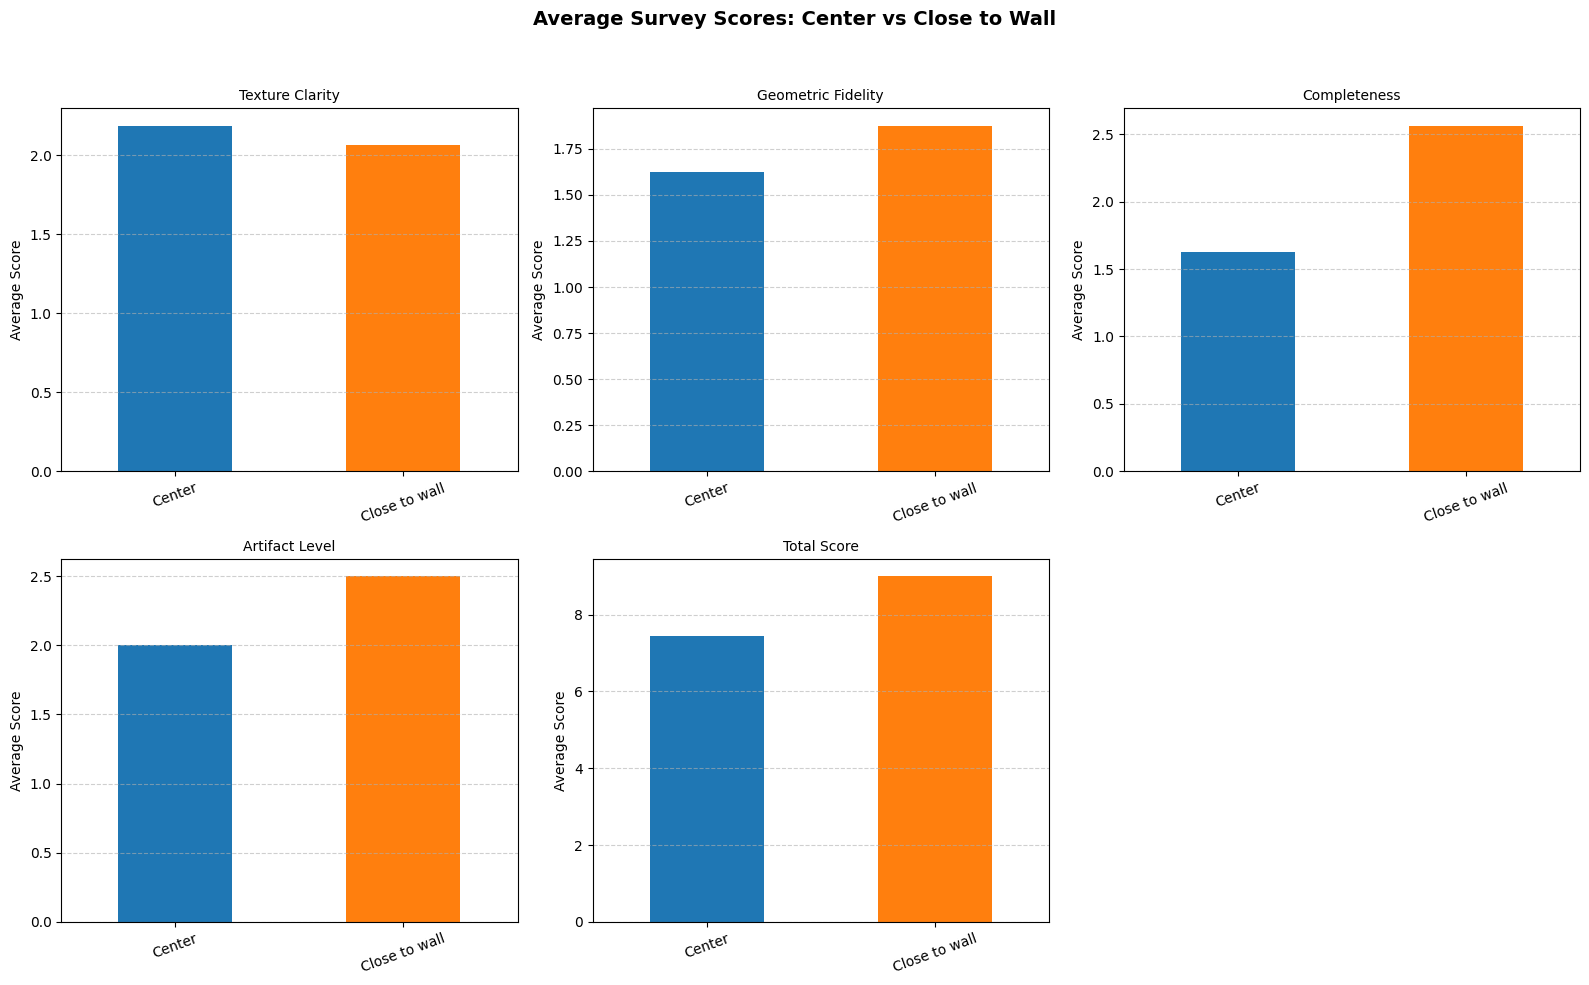

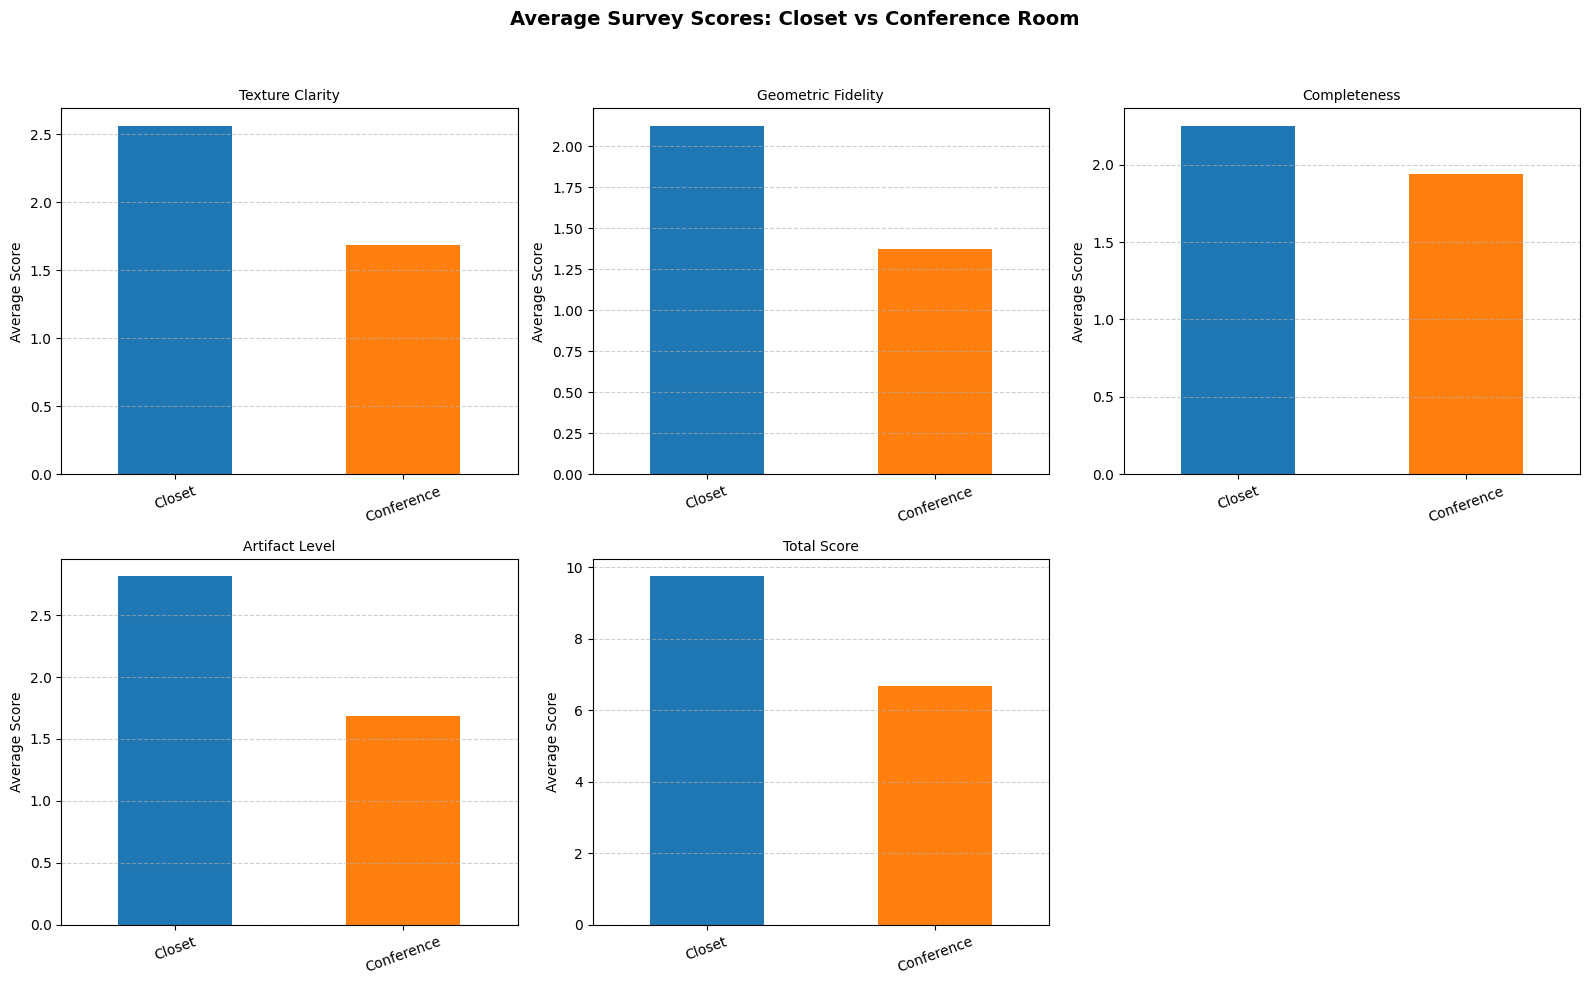

In [27]:
# --- Clean column names ---
df.columns = df.columns.str.strip()

# --- Define function for grouped averages ---
def plot_grouped_averages_horizontal(group_col, metrics, title):
    # Compute average scores for each group
    avg = df.groupby(group_col)[metrics].mean()

    # Compute subplot grid shape (2 rows)
    n_metrics = len(metrics)
    ncols = int(np.ceil(n_metrics / 2))
    nrows = 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
    fig.suptitle(title, fontsize=14, fontweight="bold")

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Use consistent tab10 colors (blue/orange)
    base_colors = plt.cm.tab10.colors[:2]

    # Loop through metrics
    for i, metric in enumerate(metrics):
        avg[metric].plot(
            kind="bar",
            ax=axes[i],
            color=base_colors,
        )
        axes[i].set_title(metric, fontsize=10)
        axes[i].set_ylabel("Average Score")
        axes[i].set_xlabel("")
        axes[i].grid(True, axis="y", linestyle="--", alpha=0.6)
        axes[i].tick_params(axis="x", rotation=20)

    # Hide unused subplots if needed
    for j in range(len(metrics), len(axes)):
        axes[j].axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# --- Technique comparison: Lidar (speed) vs Lidar (area) ---
plot_grouped_averages_horizontal(
    group_col="Technique",
    metrics=[
        "Texture Clarity",
        "Geometric Fidelity",
        "Completeness",
        "Artifact Level",
        "Total Score"
    ],
    title="Average Survey Scores: Lidar (speed) vs Lidar (area)"
)

# --- Position comparison: Center vs Close to Wall ---
plot_grouped_averages_horizontal(
    group_col="Position",
    metrics=[
        "Texture Clarity",
        "Geometric Fidelity",
        "Completeness",
        "Artifact Level",
        "Total Score"
    ],
    title="Average Survey Scores: Center vs Close to Wall"
)

# --- Room comparison: Closet vs Conference ---
plot_grouped_averages_horizontal(
    group_col="Room",
    metrics=[
        "Texture Clarity",
        "Geometric Fidelity",
        "Completeness",
        "Artifact Level",
        "Total Score"
    ],
    title="Average Survey Scores: Closet vs Conference Room"
)

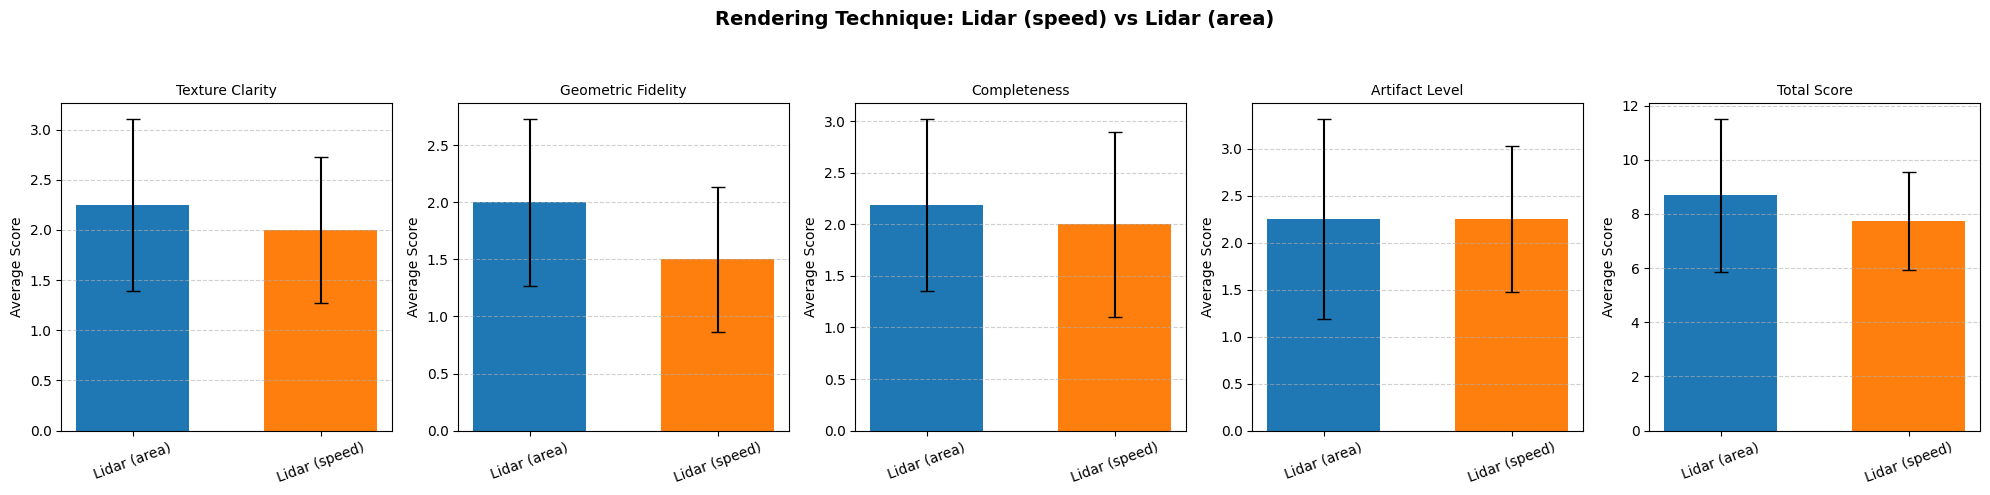

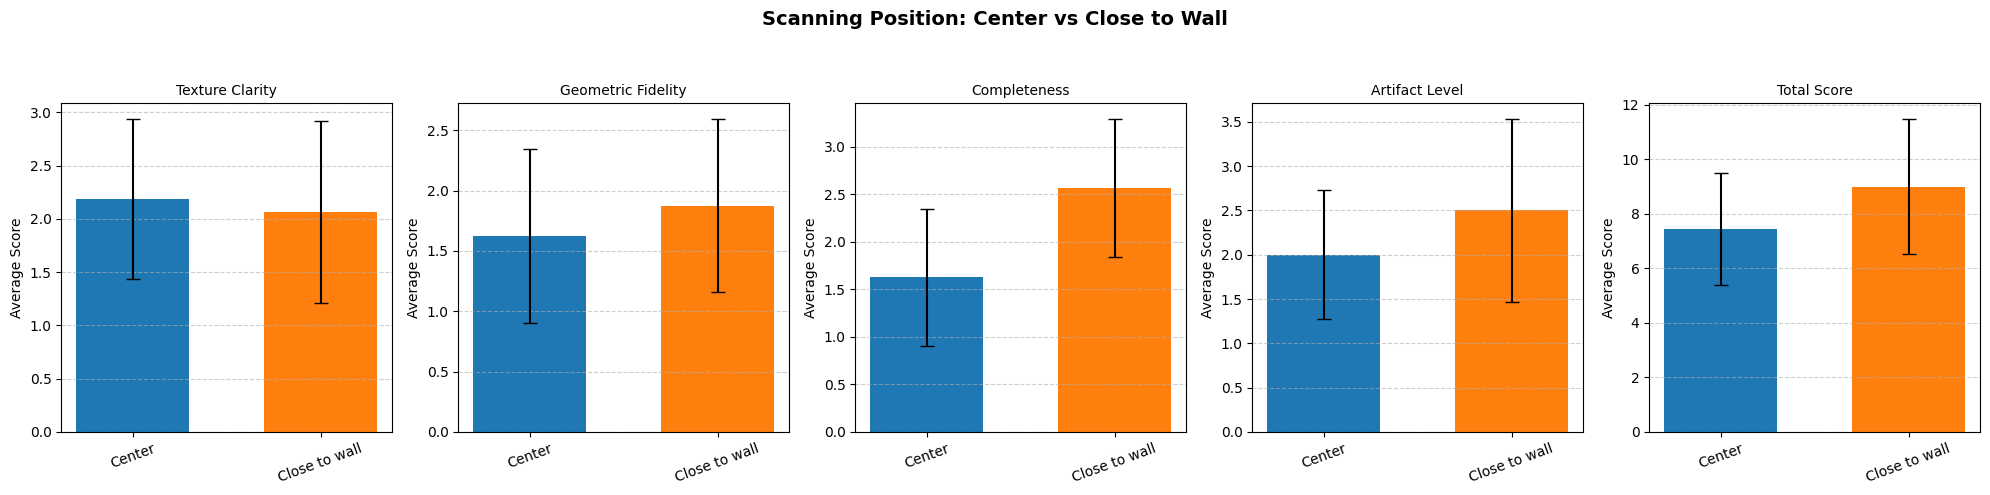

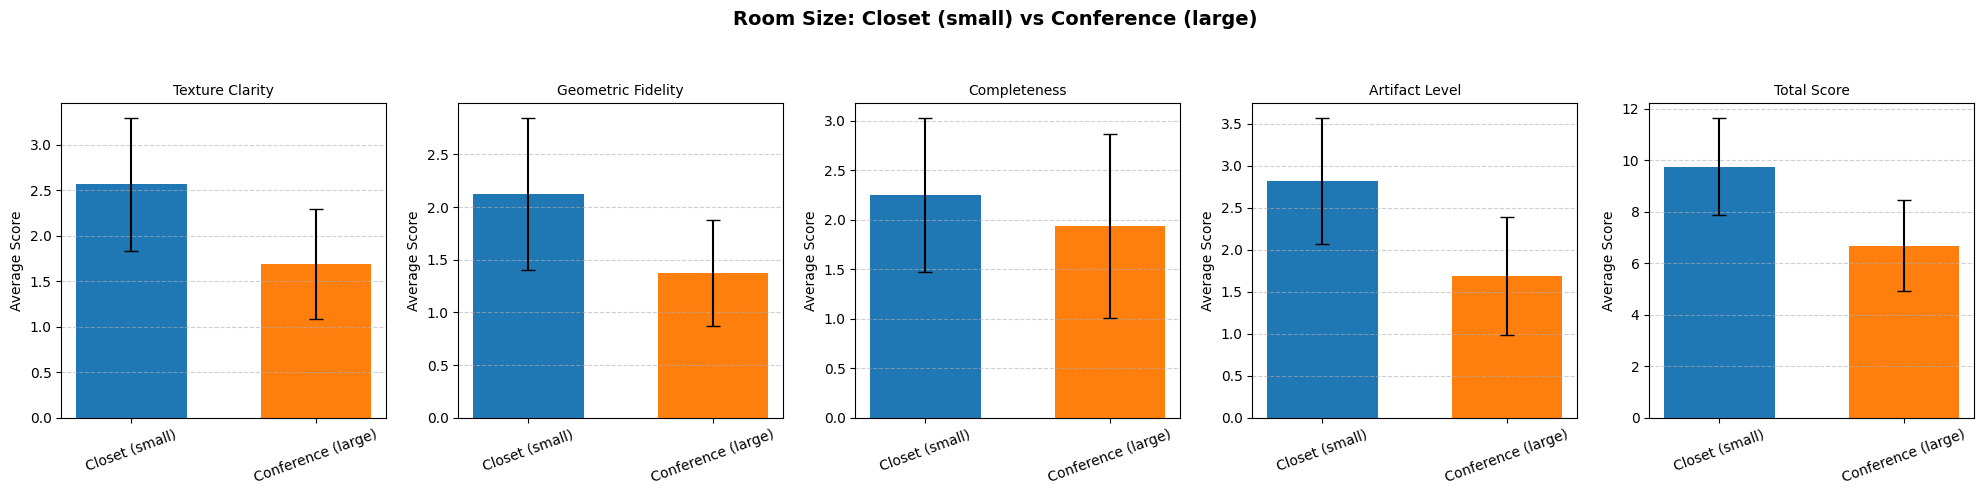

In [57]:
# --- Clean column names ---
df.columns = df.columns.str.strip()

# --- Define function for grouped averages with std and optional renaming ---
def plot_grouped_averages_horizontal_std(group_col, metrics, title, rename_dict=None):
    # Copy dataframe to avoid modifying original
    df_plot = df.copy()

    # Optional rename for readability
    if rename_dict:
        df_plot[group_col] = df_plot[group_col].replace(rename_dict)

    # Compute averages and standard deviations
    avg = df_plot.groupby(group_col)[metrics].mean()
    std = df_plot.groupby(group_col)[metrics].std()

    # One-row layout
    n_metrics = len(metrics)
    nrows = 1
    ncols = n_metrics

    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 5))
    fig.suptitle(title, fontsize=14, fontweight="bold")

    # Make sure axes is iterable (even if only one metric)
    if n_metrics == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # Use consistent tab10 colors (blue/orange)
    base_colors = plt.cm.tab10.colors[:2]

    # Loop through metrics
    for i, metric in enumerate(metrics):
        avg_vals = avg[metric]
        std_vals = std[metric]

        axes[i].bar(
            avg_vals.index,
            avg_vals.values,
            yerr=std_vals.values,
            color=base_colors[:len(avg_vals)],
            capsize=5,
            width=0.6
        )

        axes[i].set_title(metric, fontsize=10)
        axes[i].set_ylabel("Average Score")
        axes[i].set_xlabel("")
        axes[i].grid(True, axis="y", linestyle="--", alpha=0.6)
        axes[i].tick_params(axis="x", rotation=20)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


# --- Technique comparison: Lidar (speed) vs Lidar (area) ---
plot_grouped_averages_horizontal_std(
    group_col="Technique",
    metrics=[
        "Texture Clarity",
        "Geometric Fidelity",
        "Completeness",
        "Artifact Level",
        "Total Score"
    ],
    title="Rendering Technique: Lidar (speed) vs Lidar (area)"
)

# --- Position comparison: Center vs Close to Wall ---
plot_grouped_averages_horizontal_std(
    group_col="Position",
    metrics=[
        "Texture Clarity",
        "Geometric Fidelity",
        "Completeness",
        "Artifact Level",
        "Total Score"
    ],
    title="Scanning Position: Center vs Close to Wall"
)

# --- Room comparison: Closet (small) vs Conference (large) ---
plot_grouped_averages_horizontal_std(
    group_col="Room",
    metrics=[
        "Texture Clarity",
        "Geometric Fidelity",
        "Completeness",
        "Artifact Level",
        "Total Score"
    ],
    rename_dict={"Closet": "Closet (small)", "Conference": "Conference (large)"},
    title="Room Size: Closet (small) vs Conference (large)"
)

### Quantitative and Qualitative

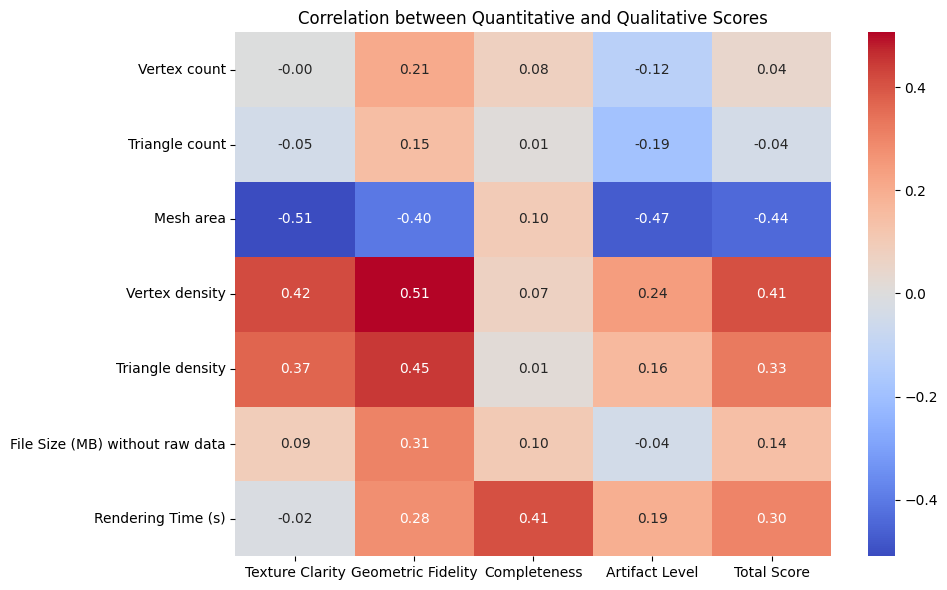

Texture Clarity     Mesh area             0.509783
Geometric Fidelity  Vertex density        0.506574
Artifact Level      Mesh area             0.472786
Geometric Fidelity  Triangle density      0.447295
Total Score         Mesh area             0.438981
Texture Clarity     Vertex density        0.416561
Total Score         Vertex density        0.410377
Completeness        Rendering Time (s)    0.409490
Geometric Fidelity  Mesh area             0.404957
Texture Clarity     Triangle density      0.369252
dtype: float64


In [77]:
# --- Load data ---
df_quant = pd.read_csv(f'{data_dir}/scan_results_trimesh.csv')
df_qual = pd.read_csv(f'{data_dir}/qual_results.csv')

df_quant.columns = df_quant.columns.str.strip()
df_qual.columns = df_qual.columns.str.strip()

# --- Derived metrics ---
df_quant["Vertex density"] = df_quant["Vertex count"] / df_quant["Mesh area"]
df_quant["Triangle density"] = df_quant["Triangle count"] / df_quant["Mesh area"]

# --- Merge on filename ---
df_combined = pd.merge(df_quant, df_qual, on="Filename", suffixes=("_quant", "_qual"))
df_combined["Technique"] = df_combined["Technique_qual"].combine_first(df_combined["Technique_quant"])
df_combined["Room"] = df_combined["Room_qual"].combine_first(df_combined["Room_quant"])

# --- Correlation matrix ---
quant_metrics = [
    "Vertex count", "Triangle count", "Mesh area",
    "Vertex density", "Triangle density",
    "File Size (MB) without raw data", "Rendering Time (s)"
]
qual_metrics = [
    "Texture Clarity", "Geometric Fidelity",
    "Completeness", "Artifact Level", "Total Score"
]

corr = df_combined[quant_metrics + qual_metrics].corr(method="pearson")
cross_corr = corr.loc[quant_metrics, qual_metrics]

plt.figure(figsize=(10, 6))
sns.heatmap(cross_corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation between Quantitative and Qualitative Scores")
plt.tight_layout()
plt.show()

# --- Print strongest correlations ---
top_corr = cross_corr.abs().unstack().sort_values(ascending=False)
print(top_corr.head(10))


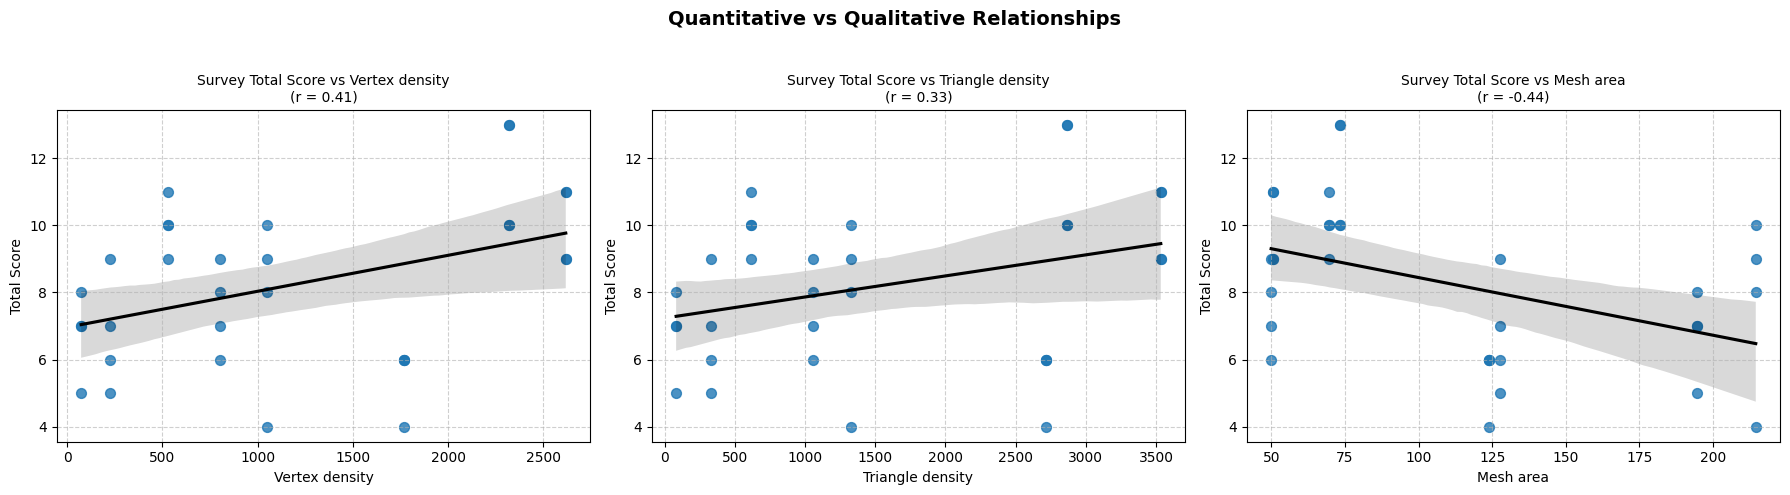

In [89]:
# --- Derived consistent columns (if not already unified) ---
df_combined["Technique"] = df_combined["Technique_qual"].combine_first(df_combined["Technique_quant"])
df_combined["Room"] = df_combined["Room_qual"].combine_first(df_combined["Room_quant"])

# --- Three key relationships in one row ---
scatter_pairs = [
    ("Vertex density", "Total Score"),
    ("Triangle density", "Total Score"),
    ("Mesh area", "Total Score")
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Quantitative vs Qualitative Relationships", fontsize=14, fontweight="bold")

for i, (x, y) in enumerate(scatter_pairs):
    sns.regplot(
        data=df_combined,
        x=x,
        y=y,
        ax=axes[i],
        scatter_kws={"s": 50, "alpha": 0.8},
        line_kws={"color": "black"},
        ci=95   # confidence interval shading
    )
    r_val = df_combined[[x, y]].corr().iloc[0, 1]
    axes[i].set_title(f"Survey {y} vs {x}\n(r = {r_val:.2f})", fontsize=10)
    axes[i].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()